In [1]:
%matplotlib inline
from pycocotools.cocoz import ImageZ, AnnZ, COCOZ
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

ModuleNotFoundError: No module named 'pycocotools._mask'

In [2]:
root = 'E:\Data\coco'
annType = 'annotations_trainval2017'

annZ = AnnZ(root, annType)
annZ.names

['annotations/instances_train2017.json',
 'annotations/instances_val2017.json',
 'annotations/captions_train2017.json',
 'annotations/captions_val2017.json',
 'annotations/person_keypoints_train2017.json',
 'annotations/person_keypoints_val2017.json']

In [3]:
# initialize COCO api for instance annotations
annFile = 'annotations/instances_val2017.json'
coco = COCOZ(annZ, annFile)

Loading json in memory ...
used time: 0.845972 s
Loading json in memory ...
creating index...
index created!
used time: 0.429031 s


In [5]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms = set([cat['name'] for cat in cats])  # 获取 cat 的 name 信息
print('COCO categories: \n{}\n'.format(' '.join(nms)))
# ============================================================
snms = set([cat['supercategory'] for cat in cats])  # 获取 cat 的 name 信息
print('COCO supercategories: \n{}'.format(' '.join(snms)))

COCO categories: 
bird broccoli fire hydrant parking meter cake dining table teddy bear truck bus bench surfboard spoon hot dog pizza mouse handbag orange zebra wine glass umbrella knife refrigerator cell phone couch carrot bed hair drier stop sign horse tennis racket laptop dog cup tv microwave toaster book boat toothbrush train banana keyboard scissors oven toilet suitcase baseball bat clock tie sports ball frisbee snowboard sheep skis vase potted plant elephant apple sink car kite fork donut motorcycle giraffe bottle cow chair skateboard cat sandwich person remote airplane bowl traffic light backpack bear bicycle baseball glove

COCO supercategories: 
appliance electronic furniture outdoor indoor person food kitchen animal vehicle sports accessory


In [6]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

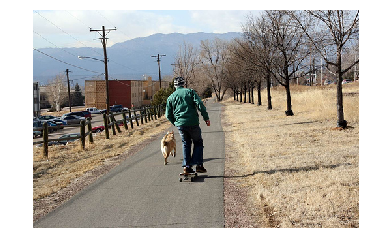

In [11]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

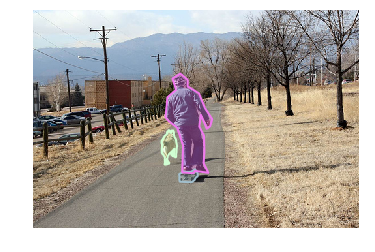

In [12]:
# load and display instance annotations
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [14]:
# initialize COCO api for person keypoints annotations
annFile = 'annotations/person_keypoints_val2017.json'
coco_kps = COCOZ(annZ, annFile)

Loading json in memory ...
used time: 0.409981 s
Loading json in memory ...
creating index...
index created!
used time: 0.358976 s


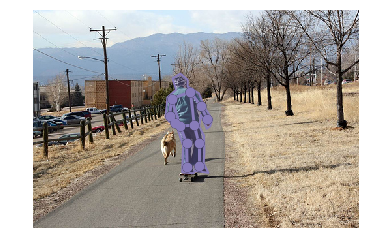

In [15]:
# load and display keypoints annotations
plt.imshow(I)
plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [16]:
# initialize COCO api for caption annotations
annFile = 'annotations/captions_val2017.json'
coco_caps = COCOZ(annZ, annFile)

Loading json in memory ...
used time: 0.0619986 s
Loading json in memory ...
creating index...
index created!
used time: 0.0160005 s


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


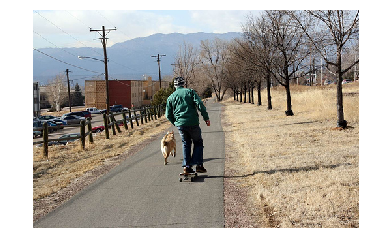

In [17]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I)
plt.axis('off')
plt.show()